In [1]:
import pandas as pd 

clean_df = pd.read_csv('clean_tabla.csv', index_col=0)

c:\users\bautista\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
import umap
import umap.plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

df = clean_df.copy()
df.head(5)

,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,...,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,satisfactorio,satisfactorio,NaN,NaN,1.0,1.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,por_debajo_del_basico,basico,NaN,NaN,0.0,1.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,satisfactorio,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,basico,por_debajo_del_basico,NaN,NaN,NaN,...,0.0,0.0,1.169184,0.0,0.0,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,satisfactorio,avanzado,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [3]:
#Keep only Secundaria
data = df[(df.nivel_id == 3) & (df.mate_nc_na == 0)].copy()

In [4]:
to_keep = ['nivel_desemp_matematica', 'tiene_smartphone', 'indice_socioeconomico', 'indice_socioeconomico_medio_cat']
data = data[to_keep].dropna()
data

,nivel_desemp_matematica,tiene_smartphone,indice_socioeconomico,indice_socioeconomico_medio_cat
id,,,,
1037297.0,por_debajo_del_basico,1.0,1.0,1.0
1014085.0,basico,1.0,1.0,1.0
1130145.0,avanzado,1.0,1.0,1.0
1047308.0,basico,0.0,1.0,1.0
1206413.0,basico,1.0,2.0,1.0
...,...,...,...,...
1000351.0,basico,1.0,2.0,2.0
1122927.0,satisfactorio,0.0,1.0,2.0
973858.0,avanzado,1.0,2.0,2.0


In [5]:
replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
data.replace(to_replace=replace, value=None, inplace=True)

In [7]:
train = data.sample(10000).copy()

c:\users\bautista\appdata\local\programs\python\python39\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Wall time: 20.1 s


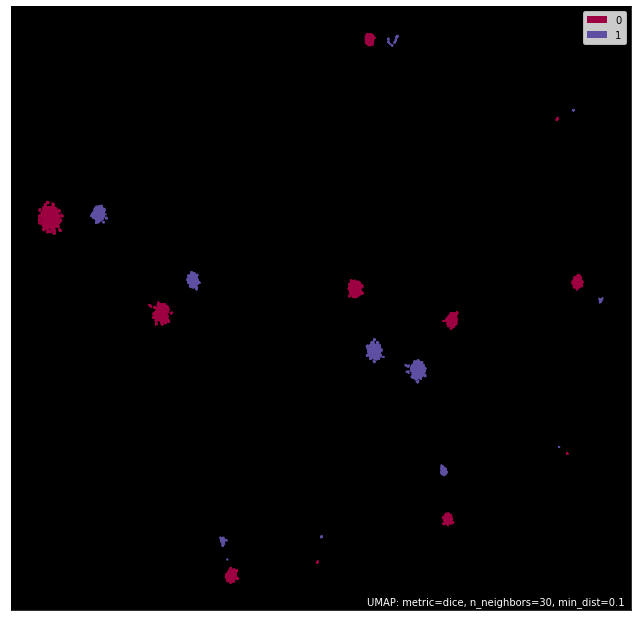

In [8]:
%%time

def train_UMAP(df, n_neighbors=15, min_dist=0.1,spread=1.0, repulsion_str = 1, metric='euclidean', n_epochs=None):
  mapper = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist,metric=metric,n_epochs=n_epochs, spread=spread, repulsion_strength=repulsion_str)
  return mapper.fit(df[df.columns.difference(['nivel_desemp_matematica'])], df.nivel_desemp_matematica)

UMAP_model = train_UMAP(df=train,n_neighbors=30,min_dist=0.1, spread=1,repulsion_str=1, metric='dice')

def plot_umap(model=UMAP_model, labels=train.nivel_desemp_matematica):
    umap.plot.points(model,labels=labels, background='black')


plot_umap()